In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#using pandas to import your excel sheet as a dataframe
filename = 'records1.xml.xlsx'
df = pd.read_excel(filename)
sorted_by_paid = df.sort_values(['PAID'], ascending=False)
#highest paid insurances
sorted_by_paid
df['REMAINING'] = df['CHARGE'] - df['PAID']
#showing the remaning amount each has to pay
df1=df
#using pivot tables 
df_subset = df[['NAME','PAID']]
df_subset.head()
company_by_year = df_subset.pivot_table(index=['NAME'])

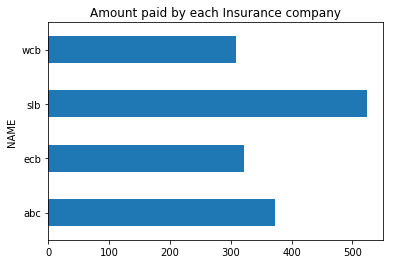

,CHARGE,PAID,REMAINING
NAME,,,
abc,440.000,372.00,68.000
ecb,421.875,321.25,100.625
slb,650.000,523.75,126.250
wcb,420.000,308.00,112.000


In [25]:
#this gives the total amount paid by the company
company_by_year.head()
plt.title("Amount paid by each Insurance company")
company_by_year['PAID'].plot(kind="barh")
plt.show()
df_sub1 = df[['NAME','PAID','REMAINING','CHARGE']]
# showing what each company is charged,remaining ,paid
df_sub1
df_by_name = df_sub1.pivot_table(index=['NAME'])
df_by_name

In [25]:
sorted_by_diff = df.sort_values(['DIFFERENCE'], ascending=True)
sorted_by_diff.head(5)

,CPT,DOS,DOP,NAME,CHARGE,PAID,REMAINING,DIFFERENCE
23,11115,2018-07-05,2018-06-02,slb,500,400,100,-33 days
0,11111,2018-07-03,2018-07-05,abc,200,100,100,2 days
42,11112,2018-07-03,2018-07-05,abc,200,100,100,2 days
35,11114,2018-07-03,2018-07-05,ecb,200,100,100,2 days
45,11113,2018-07-03,2018-07-13,abc,1000,950,50,10 days


In [18]:
#top cpt practises
df_subset_cpt = df[['CPT','PAID']]
df_subset_cpt.head()
df_subset_cpt_table=df_subset_cpt['CPT'].value_counts()
# creating count of each cpt
df_subset_cpt_count_table = pd.value_counts(df_subset_cpt.CPT).to_frame().reset_index()
df_subset_cpt_count_table.columns=['CPT','COUNT']
df_subset_cpt_count_table

,CPT,COUNT
0,11112,15
1,11115,10
2,11113,10
3,11114,8
4,11111,6


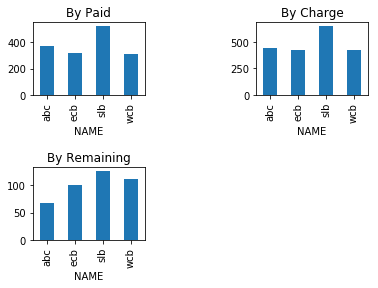

In [20]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.title('By Paid')
df_by_name['PAID'].plot(kind="bar")
plt.subplot(2, 2, 2)
plt.title('By Charge')
df_by_name['CHARGE'].plot(kind="bar")
plt.subplot(2, 2, 3)
plt.title('By Remaining')
df_by_name['REMAINING'].plot(kind="bar")

fig.subplots_adjust(wspace=1)
fig.subplots_adjust(hspace=1)
plt.show()